In [1]:
import numpy as np
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt 

### 1. Dataset 

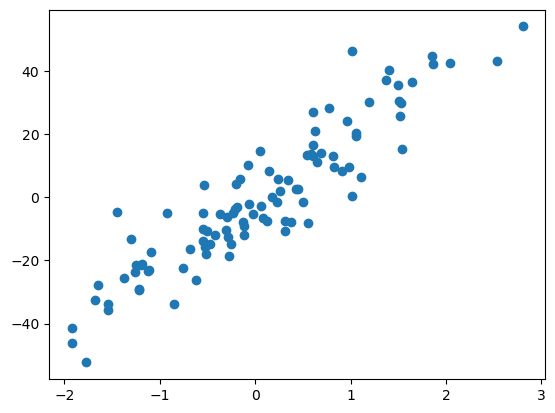

In [3]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [6]:
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [9]:
# Matrice X
X = np.hstack((x, np.ones(x.shape)))
X

(100, 2)

In [10]:
theta = np.random.randn(2,1)
theta

array([[ 0.06506087],
       [-0.1995992 ]])

### 2. Modèle 

In [23]:
def model(X, theta):
    return X.dot(theta)

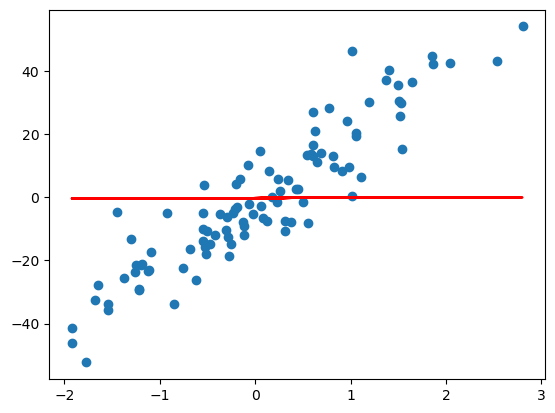

In [28]:
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r')

### Fonction cout

In [30]:
def cost_function(X, y , theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X, theta)-y)**2)

In [31]:
cost_function(X, y , theta)

247.00419945269095

### Descente de Gradient

In [32]:
def grad(X, y , theta):
    m = len(y)
    return 1/m*X.T.dot(model(X, theta)-y)

In [45]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta-learning_rate*grad(X,y,theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

### Entraînement du modèle 

In [46]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iteration=1000)

In [47]:
theta_final

(array([[20.04512486],
        [-1.1997236 ]]),
 array([242.64509116, 238.37716049, 234.1984947 , 230.1072213 ,
        226.10150717, 222.17955776, 218.33961624, 214.57996277,
        210.89891364, 207.29482056, 203.76606992, 200.31108202,
        196.92831037, 193.616241  , 190.37339178, 187.19831172,
        184.08958034, 181.04580703, 178.06563038, 175.14771761,
        172.29076396, 169.49349207, 166.75465144, 164.07301783,
        161.44739273, 158.87660281, 156.3594994 , 153.89495794,
        151.48187752, 149.11918033, 146.80581121, 144.54073716,
        142.32294689, 140.15145031, 138.02527816, 135.94348151,
        133.90513136, 131.90931821, 129.95515168, 128.04176004,
        126.1682899 , 124.33390575, 122.53778963, 120.77914077,
        119.05717516, 117.37112528, 115.7202397 , 114.10378276,
        112.52103425, 110.97128903, 109.45385681, 107.96806173,
        106.51324214, 105.08875026, 103.69395188, 102.32822613,
        100.99096511,  99.68157372,  98.3994693 ,  97.14

In [48]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions,c='r')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.